In [1]:
from sklearn import tree
from sklearn import model_selection
from sklearn import metrics
from sklearn import pipeline
from sklearn import preprocessing
from sklearn import compose
from sklearn import ensemble
import graphviz
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

9. This problem involves the OJ data set which is part of the ISLR2
package.

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/makbigc/ISLR/master/datasets/OJ.csv')

df['Purchase'] = (df['Purchase']=='CH').astype(int)
#Purchase - CH citrus Hill, MM = minute maid; #1 == CH; 0 == MM
df

,Unnamed: 0,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,1,237,1,1.75,1.99,0.00,0.00,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,1,239,1,1.75,1.99,0.00,0.30,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,1,245,1,1.86,2.09,0.17,0.00,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,0,227,1,1.69,1.69,0.00,0.00,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,1,228,7,1.69,1.69,0.00,0.00,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,1066,1,252,7,1.86,2.09,0.10,0.00,0,0,0.587822,2.09,1.76,0.33,Yes,0.000000,0.053763,0.23,0
1066,1067,1,256,7,1.86,2.18,0.00,0.00,0,0,0.670258,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0
1067,1068,0,257,7,1.86,2.18,0.00,0.00,0,0,0.736206,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0
1068,1069,1,261,7,1.86,2.13,0.00,0.24,0,0,0.588965,1.89,1.86,0.03,Yes,0.112676,0.000000,0.27,0


In [244]:
pd.unique(df['STORE'])

array([1, 0, 2, 3, 4])

In [245]:
df[df['StoreID']==7]['Store7']
df[df['StoreID']==4]

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
38,1,271,4,1.99,2.09,0.1,0.4,1,0,0.400000,1.69,1.89,-0.20,No,0.191388,0.050251,0.10,4
39,1,227,4,1.79,1.79,0.0,0.0,0,1,0.920961,1.79,1.79,0.00,No,0.000000,0.000000,0.00,4
40,1,229,4,1.79,1.79,0.0,0.0,0,0,0.936769,1.79,1.79,0.00,No,0.000000,0.000000,0.00,4
41,1,230,4,1.79,1.79,0.0,0.0,0,0,0.949415,1.79,1.79,0.00,No,0.000000,0.000000,0.00,4
42,1,233,4,1.79,2.09,0.0,0.0,0,0,0.959532,2.09,1.79,0.30,No,0.000000,0.000000,0.30,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0,243,4,1.99,2.23,0.0,0.0,0,0,0.320000,2.23,1.99,0.24,No,0.000000,0.000000,0.24,4
1022,0,254,4,1.99,2.29,0.0,0.0,1,0,0.688075,2.29,1.99,0.30,No,0.000000,0.000000,0.30,4
1024,1,258,4,1.99,2.29,0.0,0.0,0,0,0.640368,2.29,1.99,0.30,No,0.000000,0.000000,0.30,4
1031,1,269,4,1.99,2.09,0.1,0.0,0,0,0.924580,2.09,1.89,0.20,No,0.000000,0.050251,0.10,4


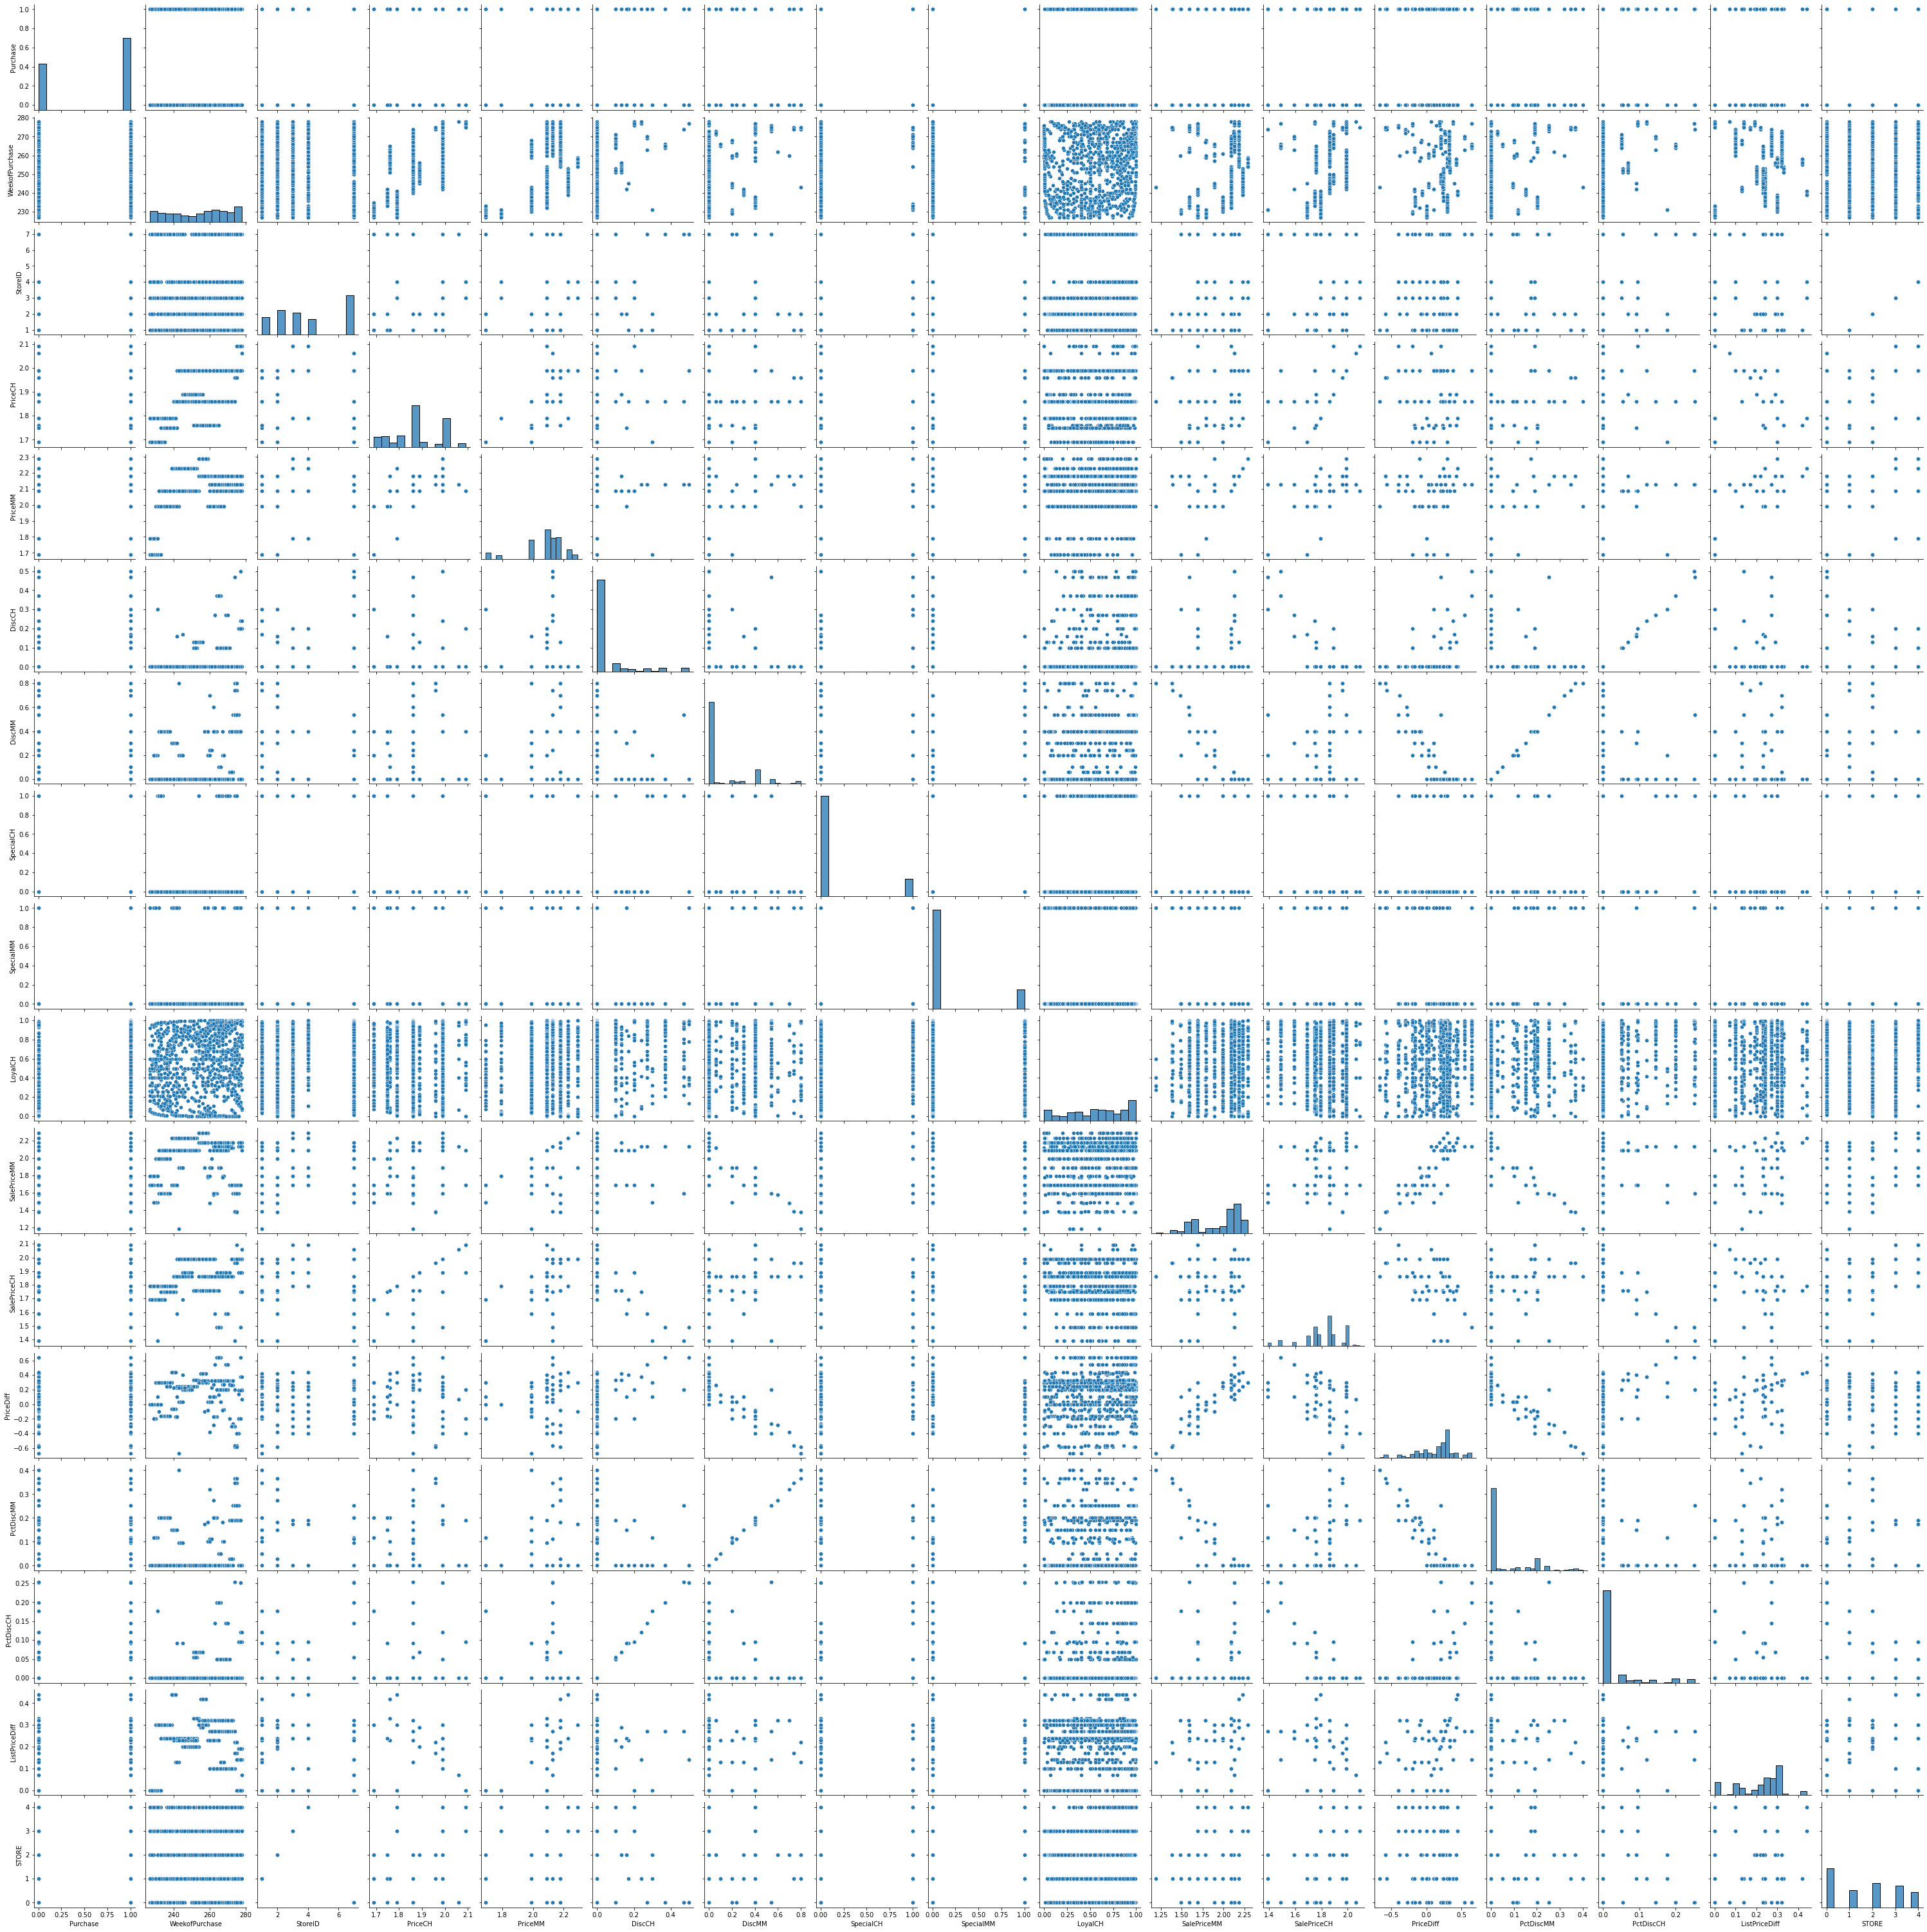

In [246]:
sns.pairplot(data=df)

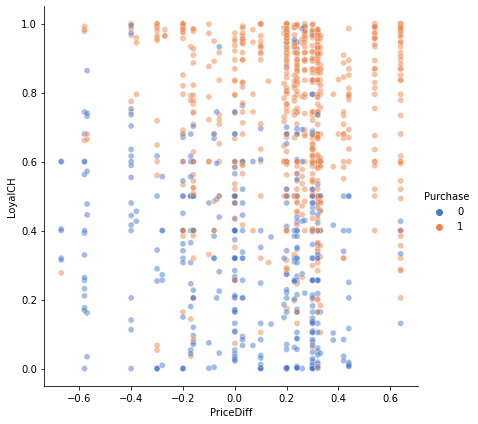

In [247]:
sns.relplot(x='PriceDiff', y="LoyalCH", hue="Purchase", 
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

<AxesSubplot:xlabel='Purchase', ylabel='LoyalCH'>

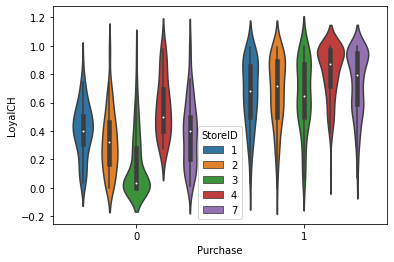

In [248]:
sns.violinplot(x='Purchase', y='LoyalCH', hue='StoreID', data=df)

<AxesSubplot:xlabel='Purchase', ylabel='PriceDiff'>

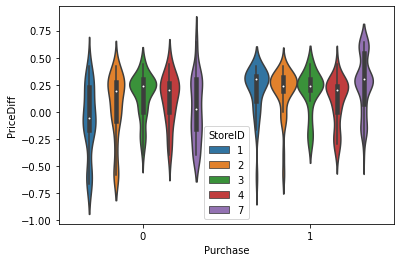

In [249]:
sns.violinplot(x='Purchase', y='PriceDiff', hue='StoreID', data=df)

<AxesSubplot:xlabel='Purchase', ylabel='SalePriceMM'>

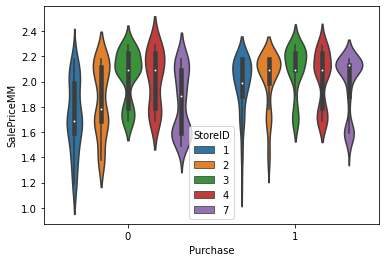

In [250]:
sns.violinplot(x='Purchase', y='SalePriceMM', hue='StoreID', data=df)

(a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

In [251]:
X = df.drop(['Purchase', 'Store7', 'STORE'], axis=1) #store is stored in StoreID variable; 
#Not quite sure about Week of Purchase
y = df['Purchase']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

(b) Fit a tree to the training data, with Purchase as the response
and the other variables as predictors. Use the summary() function
to produce summary statistics about the tree, and describe the
results obtained. What is the training error rate? How many
terminal nodes does the tree have?

In [252]:
decision_tree = tree.DecisionTreeClassifier(random_state=42)#, max_leaf_nodes=3, max_depth=2)
decision_tree = decision_tree.fit(X_train, y_train)
r = tree.export_text(decision_tree, feature_names=X_train.columns.tolist())
print(r)

|--- LoyalCH <= 0.48
|   |--- LoyalCH <= 0.28
|   |   |--- LoyalCH <= 0.06
|   |   |   |--- WeekofPurchase <= 268.50
|   |   |   |   |--- class: 0
|   |   |   |--- WeekofPurchase >  268.50
|   |   |   |   |--- PriceDiff <= 0.29
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- PriceDiff >  0.29
|   |   |   |   |   |--- class: 1
|   |   |--- LoyalCH >  0.06
|   |   |   |--- SalePriceMM <= 2.26
|   |   |   |   |--- LoyalCH <= 0.06
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- LoyalCH >  0.06
|   |   |   |   |   |--- StoreID <= 3.50
|   |   |   |   |   |   |--- PriceDiff <= 0.31
|   |   |   |   |   |   |   |--- StoreID <= 1.50
|   |   |   |   |   |   |   |   |--- WeekofPurchase <= 243.00
|   |   |   |   |   |   |   |   |   |--- LoyalCH <= 0.12
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- LoyalCH >  0.12
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- WeekofPurchase >  243.00
|   |   

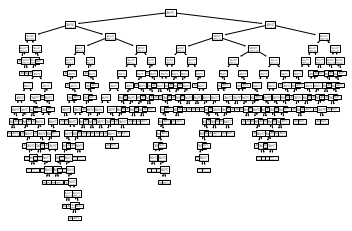

In [253]:
tree.plot_tree(decision_tree)
plt.show()

In [254]:
print(decision_tree.get_n_leaves())
print(decision_tree.get_depth())
print(decision_tree.score(X, y))
print(decision_tree.score(X_train, y_train))
print(decision_tree.score(X_test, y_test))

173
17
0.9289719626168225
0.9929906542056075
0.6728971962616822


(c) Type in the name of the tree object in order to get a detailed
text output. Pick one of the terminal nodes, and interpret the
information displayed.

In [255]:
#see above

(d) Create a plot of the tree, and interpret the results.

In [256]:
#see above

(e) Predict the response on the test data, and produce a confusion
matrix comparing the test labels to the predicted test labels.
What is the test error rate?

In [257]:
print(metrics.confusion_matrix(y_test, decision_tree.predict(X_test)))
print(metrics.accuracy_score(y_test, decision_tree.predict(X_test)))
#error rate = 1-0.67289, 32% or so.

[[ 44  40]
 [ 30 100]]
0.6728971962616822


(f) Apply the cv.tree() function to the training set in order to
determine the optimal tree size.

In [258]:
?model_selection.cross_val_score

[(3, 0.7794392523364486), (4, 0.7775700934579438), (5, 0.7794392523364486), (6, 0.7738317757009346), (7, 0.7700934579439253), (8, 0.7504672897196262), (9, 0.7523364485981309), (10, 0.7626168224299066), (11, 0.7542056074766355), (12, 0.7560747663551403), (13, 0.7523364485981309), (14, 0.7551401869158878), (15, 0.7504672897196262), (16, 0.7504672897196262), (17, 0.7532710280373831), (18, 0.7514018691588784), (19, 0.7532710280373832), (20, 0.7588785046728972), (21, 0.7495327102803738), (22, 0.7411214953271028), (23, 0.7551401869158878), (24, 0.7485981308411216), (25, 0.7514018691588784), (26, 0.7467289719626169), (27, 0.7542056074766355), (28, 0.7457943925233644), (29, 0.7457943925233644)]


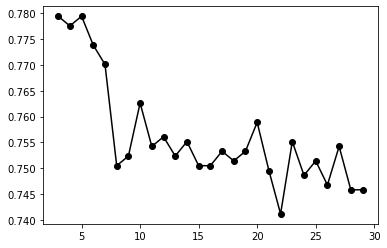

In [259]:
#https://stackoverflow.com/questions/35097003/cross-validation-decision-trees-in-sklearn
depth = []
for i in range(3,30):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    # Perform 7-fold cross validation 
    scores = model_selection.cross_val_score(estimator=clf, X=X, y=y, cv=5, n_jobs=4)
    depth.append((i,scores.mean()))
print(depth)
plt.plot(list(zip(*depth))[0], list(zip(*depth))[1],'ko-')
#so - ya, accuracy decreases for depth > 5 or so.


In [260]:
parameters = {'max_depth':range(3,35, 1)}
clf = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4, cv=10)
clf.fit(X=X, y=y)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 


0.783177570093458 {'max_depth': 3}


(g) Produce a plot with tree size on the x-axis and cross-validated
classification error rate on the y-axis.

Text(0, 0.5, 'accuracy')

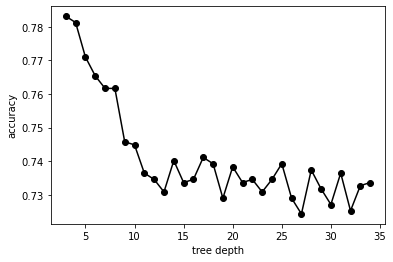

In [261]:
plt.plot(range(3,35, 1), clf.cv_results_['mean_test_score'], 'ko-')
plt.xlabel('tree depth')
plt.ylabel('accuracy')

(h) Which tree size corresponds to the lowest cross-validated classification error rate?

In [262]:
#size of 3!

(i) Produce a pruned tree corresponding to the optimal tree size
obtained using cross-validation. If cross-validation does not lead
to selection of a pruned tree, then create a pruned tree with five
terminal nodes.

## Pruning

[Sci Kit Learn Cost Complexity Tuning](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html) Minimal cost complexity pruning recursively finds the node with the “weakest link”. The weakest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first. To get an idea of what values of ccp_alpha could be appropriate, scikit-learn provides DecisionTreeClassifier.cost_complexity_pruning_path that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

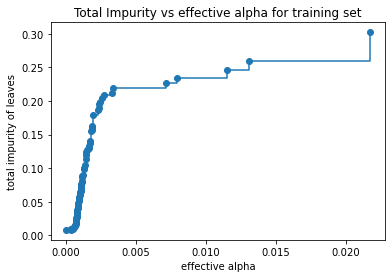

In [263]:
#
clf = tree.DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
#In the following plot, the maximum effective alpha value is removed, because it is the trivial tree with only one node.

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [264]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.17302080531212133


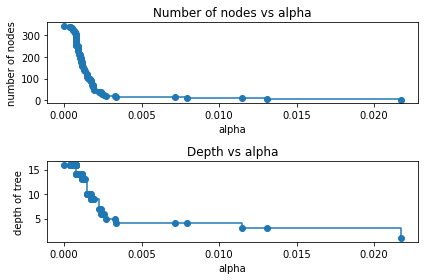

In [265]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

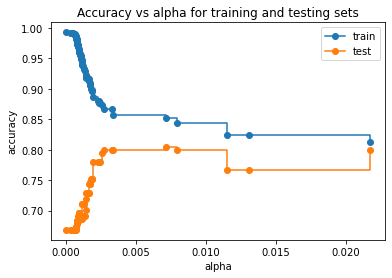

In [266]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

68
0.0071773583891047744
0.8037383177570093
|--- LoyalCH <= 0.48
|   |--- LoyalCH <= 0.28
|   |   |--- class: 0
|   |--- LoyalCH >  0.28
|   |   |--- SalePriceMM <= 2.04
|   |   |   |--- class: 0
|   |   |--- SalePriceMM >  2.04
|   |   |   |--- class: 1
|--- LoyalCH >  0.48
|   |--- LoyalCH <= 0.71
|   |   |--- PriceDiff <= 0.01
|   |   |   |--- class: 0
|   |   |--- PriceDiff >  0.01
|   |   |   |--- class: 1
|   |--- LoyalCH >  0.71
|   |   |--- class: 1



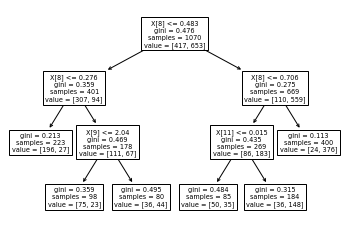

In [267]:
max_ind = test_scores.index(np.max(test_scores))
print(max_ind)
print(ccp_alphas[max_ind])
print(test_scores[max_ind])
model = clfs[max_ind].fit(X,y)
r = tree.export_text(model, feature_names=X_train.columns.tolist())
print(r)
tree.plot_tree(model)
plt.show()

In [268]:
print(model.get_depth())
print(model.get_n_leaves())

3
6


## pruning - k folds approach to select alpha

In [269]:
ccp_alpha_search = np.linspace(np.min(ccp_alphas), np.max(ccp_alphas), 100)
parameters2 = {'ccp_alpha':ccp_alpha_search}
clf2 = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), parameters2, n_jobs=8, cv=10)
clf2.fit(X=X, y=y)
model2 = clf2.best_estimator_
print (clf2.best_score_, clf2.best_params_) 

0.814018691588785 {'ccp_alpha': 0.003948847947916404}


Text(0, 0.5, 'accuracy')

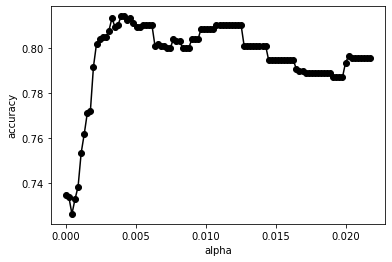

In [270]:
plt.plot(ccp_alpha_search, clf2.cv_results_['mean_test_score'], 'ko-')
plt.xlabel('alpha')
plt.ylabel('accuracy')

In [271]:
clf2.score(X_test, y_test)

0.8037383177570093

(j) Compare the training error rates between the pruned and unpruned trees. Which is higher?

In [272]:
#Unpruned tree is nearly 100% accuracy
#After pruning, only 85%
print(decision_tree.score(X_train, y_train))
print(clf2.score(X_train, y_train))

0.9929906542056075
0.852803738317757


(k) Compare the test error rates between the pruned and unpruned
trees. Which is higher?

In [273]:
#Despite the much higher training accuracy for unpruned tree; the test accuracy is much lower indicating over-fitting
#after pruning the tree - looks much better!
print(decision_tree.score(X_test, y_test))
print(clf2.score(X_test, y_test))

0.6728971962616822
0.8037383177570093


# Regression Trees

8. In the lab, a classification tree was applied to the Carseats data set after converting Sales into a qualitative response variable. Now we will
seek to predict Sales using regression trees and related approaches,
treating the response as a quantitative variable.

In [10]:
#df = pd.read_csv('~/documents/datascience/ISLR/book_content/data/Carseats.csv')
df = pd.read_csv('https://raw.githubusercontent.com/makbigc/ISLR/master/datasets/Carseats.csv', index_col=0)
df['Urban'] = (df['Urban']=='Yes').astype('int')
df['US'] = (df['US']=='Yes').astype('int')
lc = preprocessing.LabelEncoder()
df['ShelveLoc'] = lc.fit_transform(df['ShelveLoc'])
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,0,42,17,1,1
2,11.22,111,48,16,260,83,1,65,10,1,1
3,10.06,113,35,10,269,80,2,59,12,1,1
4,7.40,117,100,4,466,97,2,55,14,1,1
5,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
396,12.57,138,108,17,203,128,1,33,14,1,1
397,6.14,139,23,3,37,120,2,55,11,0,1
398,7.41,162,26,12,368,159,2,40,18,1,1
399,5.94,100,79,7,284,95,0,50,12,1,1


(a) Split the data set into a training set and a test set.

In [278]:
X = df.drop('Sales', axis=1)
y = df['Sales']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

(b) Fit a regression tree to the training set. Plot the tree, and interpret the results. What test MSE do you obtain?

In [288]:
clf = tree.DecisionTreeRegressor()#(max_depth=5, ccp_alpha=.003)
clf.fit(X_train,y_train)
    #clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    #clf.fit(X_train, y_train)
#scores = model_selection.cross_val_score(estimator=clf, X=X, y=y, cv=5, n_jobs=4)
#print(scores.mean())
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
print(np.mean((clf.predict(X_train) - y_train)**2))
print(np.mean((clf.predict(X_test) - y_test)**2))


1.0
0.33670503808263974
0.0
6.5641012499999984


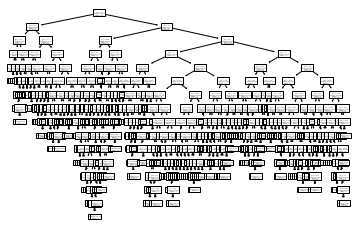

In [282]:
plt.figure(1)
tree.plot_tree(clf)
plt.show()

(c) Use cross-validation in order to determine the optimal level of
tree complexity. Does pruning the tree improve the test MSE?

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

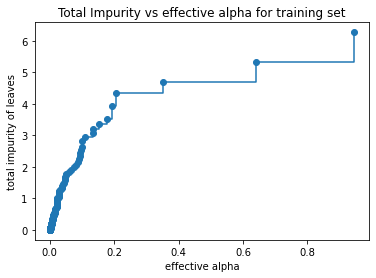

In [289]:
#
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
#In the following plot, the maximum effective alpha value is removed, because it is the trivial tree with only one node.

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [294]:
ccp_alpha_search = np.linspace(np.min(ccp_alphas), np.max(ccp_alphas), 500)
parameters2 = {'ccp_alpha':ccp_alpha_search}
clf2 = model_selection.GridSearchCV(tree.DecisionTreeRegressor(), parameters2, n_jobs=8, cv=10, scoring='neg_mean_squared_error')
clf2.fit(X=X, y=y)
model2 = clf2.best_estimator_
print (clf2.best_score_, clf2.best_params_) 

-4.540922596777132 {'ccp_alpha': 0.2507655549154148}


Text(0, 0.5, 'negative_mean_squared_error')

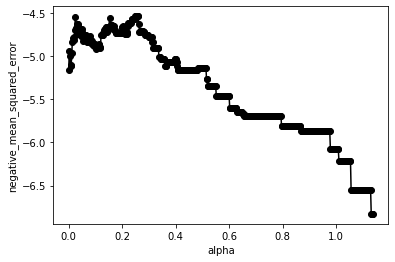

In [296]:
plt.plot(ccp_alpha_search, clf2.cv_results_['mean_test_score'], 'ko-')
plt.xlabel('alpha')
plt.ylabel('negative_mean_squared_error')

In [299]:
print(model2.score(X_train, y_train))
print(model2.score(X_test, y_test))
print(np.mean((model2.predict(X_train) - y_train)**2))
print(np.mean((model2.predict(X_test) - y_test)**2))

0.4444945681093323
0.6024156951153781
4.117455820503936
3.9345747857477007


(d) Use the bagging approach in order to analyze this data. What
test MSE do you obtain? Use the importance() function to determine which variables are most important.

In [412]:
num_trees = 150
regr = ensemble.BaggingRegressor(base_estimator=tree.DecisionTreeRegressor(),
                         n_estimators=num_trees, 
                         random_state=0,
                         oob_score=True,
                         bootstrap=True
                                ).fit(X, y)

In [413]:
print(regr.score(X_test, y_test))
print(regr.score(X,y)) #r2

0.9663175133678622
0.9596929960175197


In [414]:
print(np.mean((y - regr.oob_prediction_)**2))
print(np.mean((y_test - regr.predict(X_test))**2)) #how is this so much lower than above? probably because
#the tree fitting in Bagging method contains some of the X_test data already

#so really we should look at the oob_prediction results instead - 2.38 better than 3.93

2.38765328954709
0.3333287078888899


In [415]:
feature_importances = np.array([i.feature_importances_ for i in regr.estimators_])

Text(0, 0.5, 'Importance')

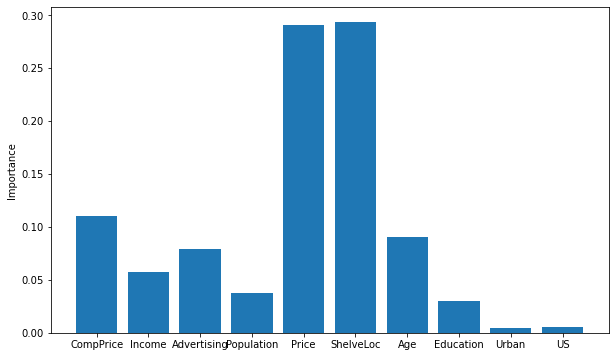

In [416]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.bar(X.columns, feature_importances.mean(axis=0))
ax.set_ylabel('Importance')

(e) Use random forests to analyze this data. What test MSE do you
obtain? Use the importance() function to determine which variables are most important. Describe the effect of m, the number of
variables considered at each split, on the error rate
obtained.

In [417]:
num_trees_rf = 150
regr_rf = ensemble.RandomForestRegressor(
                         n_estimators=num_trees, 
                         random_state=0,
                         oob_score=True,
                         bootstrap=True
                                ).fit(X, y)

In [418]:
print(regr_rf.score(X_test, y_test))
print(regr_rf.score(X,y)) #r2

0.9672489941738805
0.9599573889634891


In [419]:
print(np.mean((y - regr_rf.oob_prediction_)**2))
print(np.mean((y_test - regr_rf.predict(X_test))**2)) #how is this so much lower than above? probably because
#the tree fitting in Bagging method contains some of the X_test data already

#so really we should look at the oob_prediction results instead - 2.38 better than 3.93

2.374528996360067
0.3241105852222231


In [420]:
feature_importances_rf = np.array([i.feature_importances_ for i in regr.estimators_])

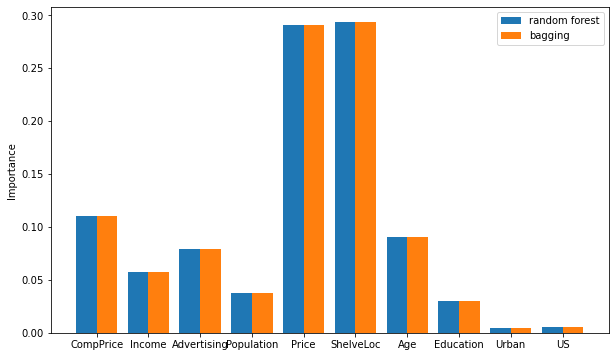

In [421]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
bar_width = 0.4
xchart = np.arange(len(X.columns))
ax.bar(xchart, feature_importances_rf.mean(axis=0), width=bar_width, label='random forest')
ax.bar(xchart + bar_width, feature_importances.mean(axis=0), width=bar_width, label='bagging')
ax.set_ylabel('Importance')
ax.set_xticks(xchart + bar_width / 2)
ax.set_xticklabels(X.columns)
plt.legend()

# maybe i should do boosting?

In [422]:
#will do gradient tree boosting (at each sequential step, fits a weak learner tree to 
#minimize the loss function (error) from the previous tree)

#rather than ada boosting (adaptive), which takes items w/ highest errors from previous tree and weights
#them more heavily when fitting next ones.

#Bagging vs Boosting
#Bagging - Parallel technique to 'bootstrap aggregate' many trees (helps reduce variance) then avg them
#Boosting - Series technique - also an ensemble technique, but fitting is done one tree at a time
# and the previous tree informs the next.

In [423]:
#https://coderzcolumn.com/tutorials/machine-learning/scikit-learn-sklearn-ensemble-learning-boosting
num_trees = 150
regr_boost = ensemble.GradientBoostingRegressor(
                         n_estimators=num_trees, 
                         random_state=0,
                                ).fit(X, y)

In [424]:
print(regr_boost.score(X_test, y_test))
print(regr_boost.score(X,y)) #r2

0.9698553940521093
0.9625751922450307


In [425]:
print(np.mean((y_test - regr_boost.predict(X_test))**2)) #how is this so much lower than above? probably because
#the tree fitting in Bagging method contains some of the X_test data already

#so really we should look at the oob_prediction results instead - 2.38 better than 3.93

0.2983171242720213


In [426]:
feature_importances_boost = regr_boost.feature_importances_

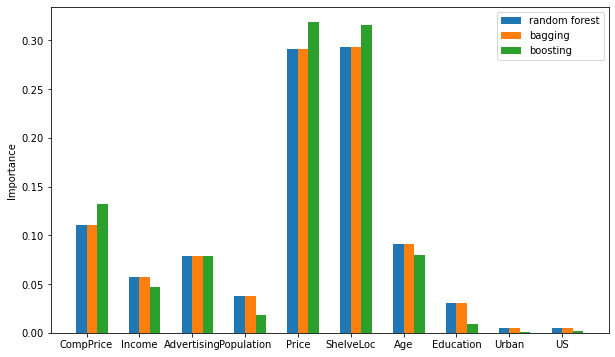

In [427]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
bar_width = 0.2
xchart = np.arange(len(X.columns))
ax.bar(xchart, feature_importances_rf.mean(axis=0), width=bar_width, label='random forest')
ax.bar(xchart + bar_width, feature_importances.mean(axis=0), width=bar_width, label='bagging')
ax.bar(xchart + bar_width*2, feature_importances_boost, width=bar_width, label='boosting')
ax.set_ylabel('Importance')
ax.set_xticks(xchart + bar_width / 2)
ax.set_xticklabels(X.columns)
plt.legend()